In [2]:
import pandas as pd

In [2]:
df = pd.read_csv("weather_data.csv")

df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [3]:

test_table = {
	'column1' : [1,2,3],
	'column2' : ['1/1/2020', '1/2/2020','1/3/2020'],
	'column3' : ['a','b','c']
}

df = pd.DataFrame(test_table)

df

,column1,column2,column3
0,1,1/1/2020,a
1,2,1/2/2020,b
2,3,1/3/2020,c


In [4]:
df = pd.read_csv("weather_data.csv")

df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [5]:
rows, columns = df.shape

In [6]:
rows

6

In [7]:
columns

4

In [8]:
type(df.day)

pandas.core.series.Series

In [9]:
df[['day','event']]

,day,event
0,1/1/2017,Rain
1,1/2/2017,Sunny
2,1/3/2017,Snow
3,1/4/2017,Snow
4,1/5/2017,Rain
5,1/6/2017,Sunny


In [10]:
df['temperature'].max()

35

In [11]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [12]:
df[ df['temperature'] >= 32 ]

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
4,1/5/2017,32,4,Rain


In [13]:
df[ df['temperature']==df['temperature'].max()]

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny


In [14]:
df['day'] [df['temperature']==df['temperature'].max()]

1    1/2/2017
Name: day, dtype: object

In [15]:
df[['day','temperature']] [df['temperature']==df['temperature'].max()]

,day,temperature
1,1/2/2017,35


In [16]:
df.set_index('day', inplace=True)

In [17]:
df.loc['1/3/2017']

temperature      28
windspeed         2
event          Snow
Name: 1/3/2017, dtype: object

In [18]:
weather_data = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'},
    
]
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


In [36]:
df = pd.read_csv("4_read_write_to_excel/stock_data.csv", na_values={
    'eps': ["n.a.","not available"],
    'people': ["n.a.","not available"],
    'revenue':  ["n.a.","not available",-1],
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


In [38]:
df.to_csv('4_read_write_to_excel/new.csv', index=False)

In [44]:
df1 = pd.read_excel("4_read_write_to_excel/stock_data.xlsx", "Sheet1")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,value you want
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [45]:
def name_of_function(cell):
    if cell=="n.a.":
        return 'value you want'
    return cell

df2 = pd.read_excel("4_read_write_to_excel/stock_data.xlsx","Sheet1", converters = {
    'people': name_of_function
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,value you want
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [46]:
with pd.ExcelWriter('check_output.xlsx') as writer:
    df1.to_excel(writer, sheet_name="sheet1")
    df2.to_excel(writer, sheet_name="sheet2")

In [48]:
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [50]:
g = df.groupby('city')
g

In [51]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [52]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [60]:
import pandas as pd
from sqlalchemy import create_engine

In [64]:
sqlcon = create_engine('mssql+pyodbc://@' + 'GHOST-117\SQLEXPRESS' + '/' + 'MOHSIN' + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')




"\nSERVER = 'GHOST-117\\SQLEXPRESS'\nDATABASE = 'MOHSIN'\nDRIVER = 'SQL Server Native Client 11.0'\nUSERNAME = 'mohsin_python'\nPASSWORD = '123456'\nDATABASE_CONNECTION = f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'\n\nengine = create_engine(DATABASE_CONNECTION)\nconnection = engine.connect()\n"

In [65]:
data = pd.read_sql_query("SELECT TOP (1000) * FROM [MOHSIN].[dbo].[customers]", sqlcon)

,customer_id,customer_fname,customer_lname,customer_email,customer_password,customer_street,customer_city,customer_state,customer_zipcode
0,1,Richard,Hernandez,XXXXXXXXX,XXXXXXXXX,6303 Heather Plaza,Brownsville,TX,78521
1,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
2,3,Ann,Smith,XXXXXXXXX,XXXXXXXXX,3422 Blue Pioneer Bend,Caguas,PR,725
3,4,Mary,Jones,XXXXXXXXX,XXXXXXXXX,8324 Little Common,San Marcos,CA,92069
4,5,Robert,Hudson,XXXXXXXXX,XXXXXXXXX,10 Crystal River Mall,Caguas,PR,725
...,...,...,...,...,...,...,...,...,...
995,996,Amanda,Smith,XXXXXXXXX,XXXXXXXXX,7007 Golden Edge,Austin,TX,78753
996,997,Mary,Price,XXXXXXXXX,XXXXXXXXX,2556 Wishing Zephyr Turnabout,Caguas,PR,725
997,998,Steven,Salinas,XXXXXXXXX,XXXXXXXXX,6091 Harvest Bluff View,Anaheim,CA,92805
998,999,Mary,Stephenson,XXXXXXXXX,XXXXXXXXX,9557 Harvest Mews,Saint Paul,MN,55124


In [71]:
df.to_sql(
    name='test',
    con=sqlcon,
    index=False,
    schema='MOHSIN.dbo',
    if_exists='replace' 
)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

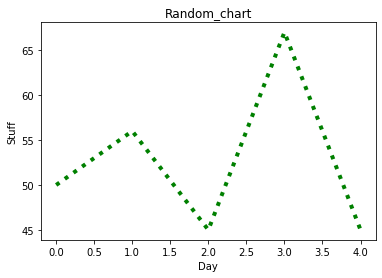

In [78]:
x=[0,1,2,3,4]
y=[50,56,45,67,45]

plt.xlabel('Day')
plt.ylabel('Stuff')
plt.title('Random_chart')
plt.plot(x,y,color='green',linewidth=4,linestyle='dotted')

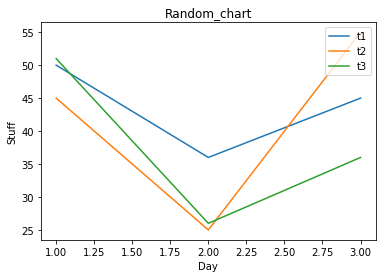

In [86]:
day=[1,2,3]
thing1=[50,36,45]
thing2=[45,25,55]
thing3=[51,26,36]

plt.xlabel('Day')
plt.ylabel('Stuff')
plt.title('Random_chart')

plt.plot(day,thing1,label='t1')
plt.plot(day,thing2,label='t2')
plt.plot(day,thing3,label='t3')

plt.legend(loc='upper right')


In [97]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

company=['google','apple','tesla']
revenue=[50,36,45]
profit=[25,20,30]

ypos = np.arange(len(company))

ypos


array([0, 1, 2])

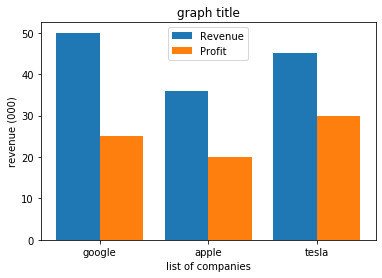

In [103]:
# define your array (number of items in 'company'):
xpos = np.arange(len(company)) # this will build an array like: array([0, 1, 2])
# replace the array values with corresponding values in 'company'
plt.xticks(xpos,company)
# labels:
plt.ylabel("revenue (000)")
plt.xlabel("list of companies")
plt.title("graph title")

# plot
plt.bar(xpos-0.2,revenue, width=0.4, label="Revenue")
plt.bar(xpos+0.2,profit, width=0.4, label="Profit")

plt.legend()


(array([1., 4., 0., 0., 1., 2., 0., 1., 0., 1.]),
 array([ 36. ,  43.7,  51.4,  59.1,  66.8,  74.5,  82.2,  89.9,  97.6,
        105.3, 113. ]),
 <a list of 10 Patch objects>)

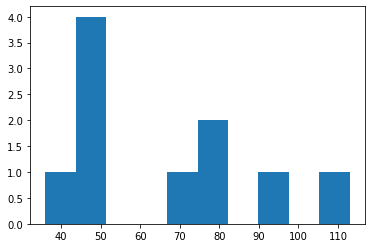

In [113]:
blood_sugar=[113,36,45,50,67,82, 50, 49, 77, 90 ]
plt.hist(blood_sugar)

(array([3., 3., 2., 1.]),
 array([ 30,  50,  70,  90, 110]),
 <a list of 4 Patch objects>)

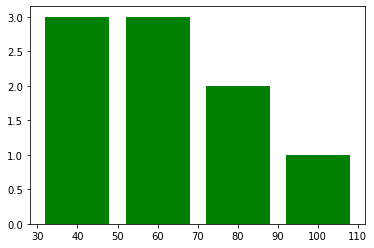

In [115]:
plt.hist(blood_sugar, bins=[30,50,70,90,110], rwidth=0.80, color='g')

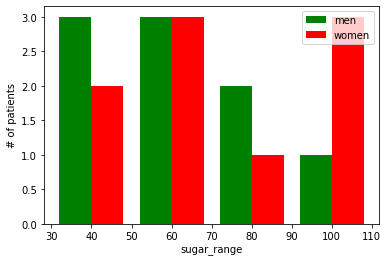

In [119]:
men=[113,36,45,50,67,82, 50, 49, 77, 90 ]
women=[110,26,65,30,77,52, 90, 49, 67, 100 ]

plt.xlabel('sugar_range')
plt.ylabel('# of patients')
plt.hist([men, women], bins=[30,50,70,90,110], rwidth=0.80, color=['green','red'], label=['men','women'])
plt.legend()

In [120]:
expenses=[1400,600,300,410,250]
expenses_labels=["rent","food","phone","car","util"]

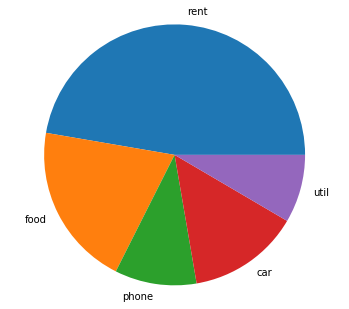

In [124]:
plt.axis("equal")
plt.pie(expenses,labels=expenses_labels, radius=1.5)
plt.show()

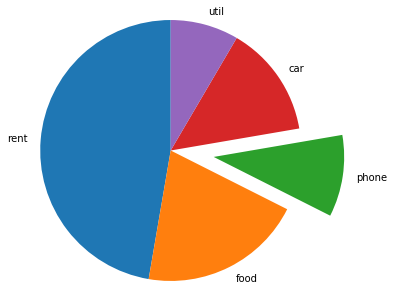

In [136]:
plt.pie(expenses,labels=expenses_labels, radius=1.5, explode=[0, 0, 0.5, 0, 0], startangle=90)
plt.show()